In [26]:
import numpy, scipy
import trig
import fibonacci_sphere
import xyzfield
from matplotlib import pyplot
import matplotlib
from mpl_toolkits import basemap
%matplotlib nbagg

### carguemos los datos sintéticos de la felicidad

In [4]:
datos_realistas = numpy.loadtxt("../data/IGRF/archeo_volc_database_3k_IGRF_2015.0.dat",
                                usecols = (0, 2, 3, 10, 11, 12))
datos_realistas[datos_realistas == 999] = numpy.nan
t_re, lat_re, lon_re, Bx_re, By_re, Bz_re = datos_realistas.T
D_re, I_re, F_re, H_re = xyzfield.xyz2difh(Bx_re, By_re, Bz_re)
theta_re, phi_re = numpy.deg2rad((90 - lat_re, lon_re))

In [52]:
lon_c = 20; lat_c = 45; colat_0 = 24.8
theta_c, phi_c, theta_0 = numpy.deg2rad((90-lat_c, lon_c, colat_0))

<IPython.core.display.Javascript object>


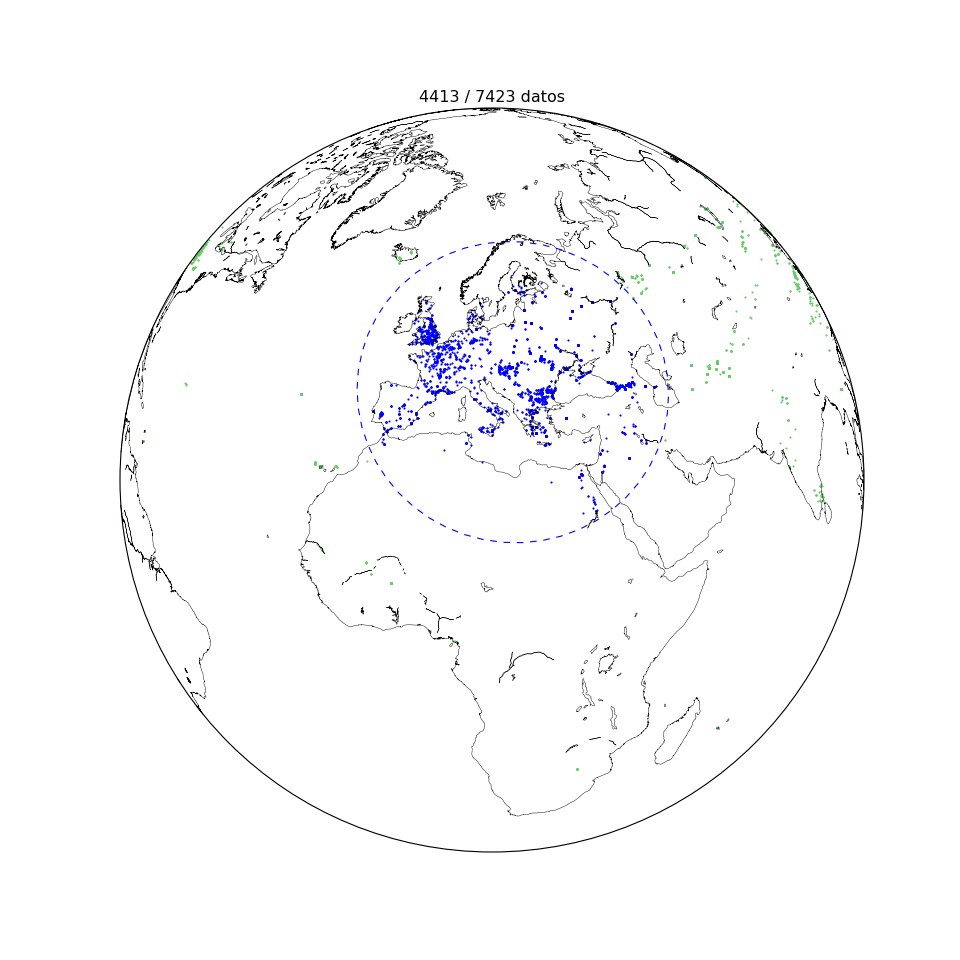

In [54]:
fig, ax = pyplot.subplots(figsize=(12,12))

in_cap = trig.angulardist(theta_re, phi_re, theta_c, phi_c) < theta_0

base = basemap.Basemap(projection='ortho', lat_0 = 30, lon_0 = 15, resolution='l')
base.drawcoastlines(ax=ax, linewidth=0.4)

base.tissot(lon_c, lat_c, colat_0, 50, fill=False, ls="dashed", edgecolor="blue")
base.scatter(lon_re[in_cap], lat_re[in_cap], s=0.8, color="blue", latlon=True)
base.scatter(lon_re[~in_cap], lat_re[~in_cap], s=0.8, color="#66CC66", latlon=True)
ax.set_title("{s} / {t} datos".format(s=len(lon_re[in_cap]), t=len(lon_re)))